<a href="https://colab.research.google.com/github/SaiArjunSairamje/Probability-and-Stats/blob/main/Prob%20%26%20Stats%20(Personal%20Notes)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <center>**Descriptive Statistics**</center>
***

In [2]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [3]:
sehwag.head()

Runs Mins  BF  4s  6s      SR  Pos Dismissal  Inns  Unnamed: 9  \
0     1    5   2   0   0   50.00    7       lbw     1         NaN   
1    19   18  24   0   1   79.16    6    caught     1         NaN   
2    58   62  54   8   0  107.40    6    bowled     1         NaN   
3     2    7   7   0   0   28.57    6    caught     2         NaN   
4    11   19  16   1   0   68.75    6   not out     2         NaN   

      Opposition     Ground   Start Date Unnamed: 13  
0     v Pakistan     Mohali   1 Apr 1999  ODI # 1427  
1     v Zimbabwe     Rajkot  14 Dec 2000  ODI # 1660  
2    v Australia  Bengaluru  25 Mar 2001  ODI # 1696  
3     v Zimbabwe   Bulawayo  27 Jun 2001  ODI # 1730  
4  v West Indies   Bulawayo  30 Jun 2001  ODI # 1731

In [4]:
dravid.head()

Runs Mins  BF  4s  6s      SR  Pos Dismissal  Inns  Unnamed: 9  \
0     3    -   4   0   0   75.00    4    caught     1         NaN   
1     4    -   7   0   0   57.14    4   run out     1         NaN   
2     3    -   5   0   0   60.00    5    caught     2         NaN   
3    11   28  21   0   0   52.38    8    caught     2         NaN   
4    22   21  15   3   0  146.66    6   not out     1         NaN   

       Opposition      Ground   Start Date Unnamed: 13  
0     v Sri Lanka   Singapore   3 Apr 1996  ODI # 1089  
1      v Pakistan   Singapore   5 Apr 1996  ODI # 1091  
2      v Pakistan     Sharjah  12 Apr 1996  ODI # 1094  
3  v South Africa     Sharjah  14 Apr 1996  ODI # 1097  
4       v England  Manchester  26 May 1996  ODI # 1104

## **(1) Let's handle sehwag.csv first**

In [6]:
sehwag.shape

(245, 14)

In [7]:
sehwag.describe()

Runs          BF          4s          6s          SR        Pos  \
count  245.000000  245.000000  245.000000  245.000000  245.000000  245.00000   
mean    33.767347   32.363265    4.620408    0.555102   93.085755    1.82449   
std     34.809419   29.175744    4.583335    1.124442   46.830716    1.24376   
min      0.000000    1.000000    0.000000    0.000000    0.000000    1.00000   
25%      8.000000   10.000000    1.000000    0.000000   65.850000    1.00000   
50%     23.000000   25.000000    3.000000    0.000000   92.230000    1.00000   
75%     46.000000   42.000000    7.000000    1.000000  123.800000    2.00000   
max    219.000000  149.000000   25.000000    7.000000  260.000000    8.00000   

             Inns  Unnamed: 9  
count  245.000000         0.0  
mean     1.530612         NaN  
std      0.500084         NaN  
min      1.000000         NaN  
25%      1.000000         NaN  
50%      2.000000         NaN  
75%      2.000000         NaN  
max      2.000000         NaN

In [8]:
sehwag["Runs"].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

### **Calculating Percentiles (25th, 50th (Median), 75th) / Quartiles (Q1, Q2, Q3)**

In [ ]:
# Approach (1)

In [9]:
perc_25 = np.percentile(sehwag["Runs"], 25)
perc_25

8.0

In [10]:
perc_50 = np.percentile(sehwag["Runs"], 50)
perc_50

23.0

In [11]:
perc_75 = np.percentile(sehwag["Runs"], 75)
perc_75

46.0

In [12]:
# Approach (2)

In [16]:
p_25 = sehwag["Runs"].quantile(0.25)      # Q1 or p_25
p_50 = sehwag["Runs"].quantile(0.5)       # Q2 or p_50 or median
p_75 = sehwag["Runs"].quantile(0.75)      # Q3 or p_75
print(p_25, p_50, p_75)

8.0 23.0 46.0


### **Calculating IQR (Interquartile Range)**

In [19]:
iqr = p_75 - p_25
iqr

38.0

### **Creating Data visualization (Box plots) for Percentiles & Quartiles**

<Axes: >

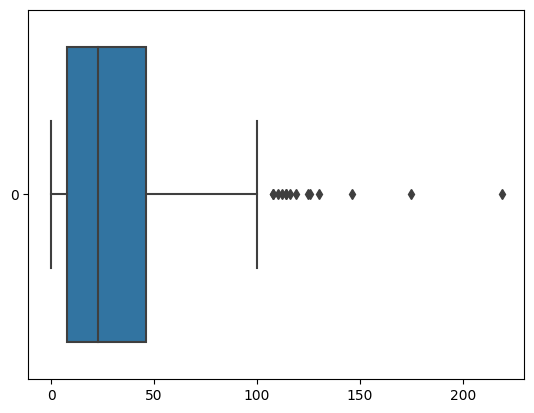

In [20]:
sns.boxplot(data = sehwag["Runs"], orient = "h")

### **Calculating the max (i.e. upper boundary) & min (i.e. lower boundary) points**

- upper_bound = min(actual_max, 75_percentile + 1.5*IQR)
- lower_bound = max(0, 25_percentile - 1.5*IQR)

In [22]:
lower = max(0, p_25 - 1.5*iqr)
lower

0

In [32]:
upper = p_75 + 1.5 * iqr      # easier code since we know the 75% percentile
upper

103.0

In [33]:
upper2 = min(max(sehwag["Runs"]), p_75 + 1.5 * iqr)
upper2

103.0

In [41]:
print(f"lower: {lower} \nupper: {upper}")

lower: 0 
upper: 103.0


### **Calculating the % of data which is above the upper_bound (i.e. outliers)**


In [43]:
sehwag_outlier = sehwag[sehwag['Runs'] > upper]      # Masking

In [44]:
len(sehwag_outlier)       # Number of Outliers

14

In [45]:
(14/245)*100          # % of Outliers

5.714285714285714

## **(2) Now let's handle dravid.csv**

In [46]:
dravid.shape

(318, 14)

In [47]:
dravid["Runs"].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

### **Calculating Percentiles (25th, 50th (Median), 75th) / Quartiles (Q1, Q2, Q3)**

In [56]:
p_25 = np.percentile(dravid["Runs"], 25)
p_25

10.0

In [57]:
p_50 = np.percentile(dravid["Runs"], 50)
p_50

26.0

In [58]:
p_75 = np.percentile(dravid["Runs"], 75)
p_75

54.0

### **Calculating IQR (Interquartile Range)**

In [64]:
iqr = p_75 - p_25
iqr

44.0

### **Creating Data visualization (Box plots) for Percentiles & Quartiles**

<Axes: >

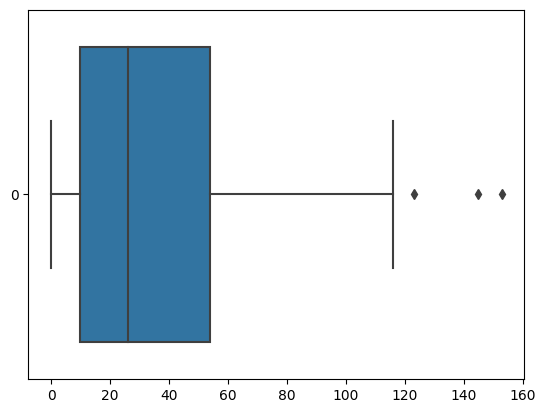

In [63]:
sns.boxplot(data = dravid["Runs"], orient = "h")

### **Calculating the max (i.e. upper boundary) & min (i.e. lower boundary) points**

In [66]:
lower = max(0, p_25 - 1.5 * iqr)
lower

0

In [67]:
upper = p_75 + 1.5 * iqr
upper

120.0

In [68]:
print(f"lower: {lower}, \nupper: {upper}")

lower: 0, 
upper: 120.0


### **Calculating the % of data which is above the upper_bound (i.e. outliers)**

In [69]:
dravid_outlier = dravid[dravid['Runs'] > upper]      # Masking

In [72]:
len(dravid_outlier)       # Number of outliers

3

In [73]:
(3 / 318) * 100       # % of Outliers

0.9433962264150944

## **(3) Let's work on weight-height.csv**

In [74]:
df_hw = pd.read_csv("weight-height.csv")
df_hw

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

In [76]:
df_hw["Height"].describe()    # inch

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [77]:
df_height = df_hw["Height"]

In [78]:
min_height = df_height.min()

In [79]:
max_height = df_height.max()

In [80]:
print(min_height, max_height)

54.2631333250971 78.9987423463896


In [82]:
total = len(df_height)
total

10000

### **Cumulative Distribution Function (CDF)**

Cumulative Distribution Function (CDF) `(Connecting CDF to percentiles and cumulative probabilities in dataset)`

> **`Approach (1):` Manual code**

> **`Approach (2):` from statsmodels.distributions.empirical_distribution import ECDF `(i.e. Empirical CDF)`**

In [83]:
# Approach (1)

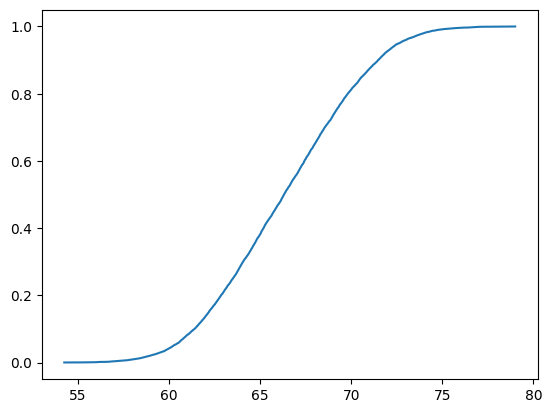

In [84]:
x_values = np.linspace(min_height, max_height, 1000)
y_values = []

for x in x_values:
    people_shorter_than_x = df_height[df_height <= x]

    num_people_shorter_than_x = len(people_shorter_than_x)

    frac_people_shorter_than_x = num_people_shorter_than_x / total

    y_values.append(frac_people_shorter_than_x)

plt.plot(x_values, y_values)

In [91]:
# Approach (2)

In [92]:
from statsmodels.distributions.empirical_distribution import ECDF       # Empirical CDF

In [87]:
e = ECDF(df_height)

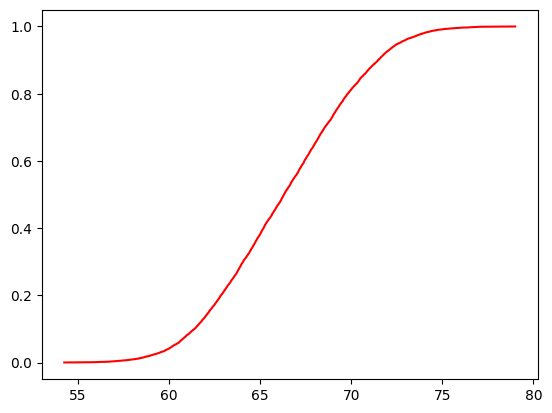

In [88]:
plt.plot(e.x, e.y, c = "r")

In [90]:
df_height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

### **Data visualization (Histogram Plot) for Distribution of the data points**

<Axes: xlabel='Height', ylabel='Count'>

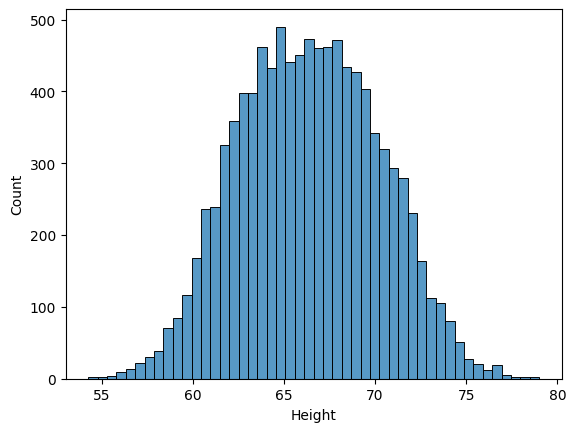

In [93]:
sns.histplot(df_height)       # Data visualization (Histogram Plot) for Distribution of the data points